<h1 style="text-align: center;">
<span style= 'color : #f31567'> Analytic Model for Light Yield version 2.0 </span> 
<!-- <span style= 'color : #f31567'> Analytic Model for Estimating Light Collection Efficiency Version 2.0 </span>  -->
</h1>
<br>
<h3 style="text-align: center;">
<span style= 'color : yellow'> It has the provision to include 1.) the Rayleigh scattering and absorption and 2.) additional terms if SiPM was covered with WLS </span> 
</h3>
<br>
<p style= "text-align: center;">
<span style = 'color:tomato'> 
    Relevant Documentation: 
<a href="https://arxiv.org/pdf/1110.6370.pdf">Segreto 2012</a>    
</span>
</p>


$$
LCE = \frac{X}{1-(s+w)} 
$$
<br>
$$ LCE = \frac{f_{sen}FF_{sys}(1-R)}{1-( f_{sen}R + (1-f_{sen})R_{wall} )} $$
<br>

<p style= "text-align: center;">
<br>
<span style = 'color:tomato'> 
    Relevant Documentation: 
<a href="https://www.overleaf.com/read/vpkvkgpfqwst">https://www.overleaf.com/read/vpkvkgpfqwst</a>
    
</span>
</p>
<p style= "text-align: center;">
<br>
<span style = 'color:tomato'> 
    Research Notes: 
<a href="https://docs.google.com/document/d/1k-8OMUld0fGFGO-Om6wp_pJkQwOL-QxgrfYoKsZIPF4/edit">Google Docs link </a>
    
</span>
</p>

In [2]:
### Note: Changing few terms to be compliant with Segreto's paper.

## LY is light collection multiplied by Scintillation yield and PDE
## the end result of all the calculations in this note book provide us Light Yield. I am calling some intermediate variables as Light Yield even though it strictly isn't light yield

## define a funtion to calculate light yield from the parameters
## wavelengths in nm throughout this notebook
## reflectivity represented as a decimal

# %matplotlib qt
# %matplotlib inline

from os import path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# %matplotlib qt 

In [3]:
def calc_LY(PDE, f_sen, FF_sys, R, R_wall):

    s = f_sen*(R)
    w = (1-f_sen)*R_wall
    X = f_sen*FF_sys*(1-R)
    LY = PDE*X/(1-(s+w)) ### This Expression is basically all there is in the Analytic Model.
                        ### Note in order to obtain Light yield we will have to multiply result of calc_LY by scintillation Yield
                         ### for derivation of the expression see overleaf document where expressions are named correctly.
    return LY
# LY1 = calc_LY()
# print('LY1: ', LY1)

In [4]:
calc_LY(0.18*1.4, 0.3, 0.95, 0.22, 0.5)

0.09592397260273972

In [5]:
# for 2PAC configuration
# PDE = 0.47
# f_sen = 0.012
# FF_sys = 1
# R = 0.17
# R_wall = 0.95
calc_LY(0.47, 0.012, 1, 0.17, 0.95)

0.07886118598382753

Text(0, 0.5, 'LC')

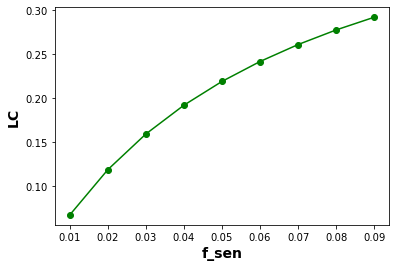

In [6]:
# Plots 
# LY on Y-axis 
# one of the parameters on the x-axis

f_sen_vector = np.arange(0.01, 0.1, 0.01)
plt.figure('f_sen vs LC')
plt.plot(f_sen_vector, calc_LY(0.47, f_sen_vector, 1, 0.17, 0.95), '-og')
plt.xlabel('f_sen', size=14, weight = 'bold')
plt.ylabel('LC', size=14, weight = 'bold')
# plt.title('f_sen vs LC')

Text(0.5, 1.0, 'R_Wall vs LC')

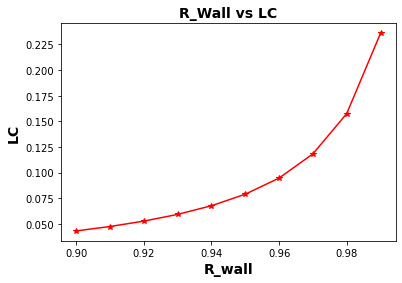

In [7]:
R_wall_vector = np.arange(0.9, 1.0, 0.01)
plt.figure(2)
plt.plot(R_wall_vector, calc_LY(0.47,0.012, 1, 0.17, R_wall_vector), '-*r')
plt.xlabel('R_wall', size=14, weight = 'bold')
plt.ylabel('LC', size =14, weight = 'bold')
plt.title('R_Wall vs LC', size =14, weight = 'bold' )

Text(0.5, 1.0, 'R vs LC')

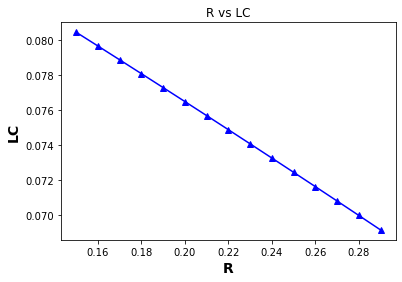

In [8]:
R = np.arange(0.15, 0.3, 0.01)
plt.figure(3)
plt.plot(R, calc_LY(0.47,0.012, 1, R, 0.95), '-^b')
plt.xlabel('R', size= 14, weight = 'bold')
plt.ylabel('LC', size= 14, weight = 'bold')
plt.title('R vs LC')

In [9]:
# # different values of f_sen and R_wall simultaneously
# LY_vector =[]
# for value_f_sen in f_sen_vector:
#     for value_R_wall in R_wall_vector:
#         LY_vector.append(calc_LY(0.47, value_f_sen, 1, 0.17, value_R_wall))
# plt.plot(LY_vector, label = 'Values')
# plt.legend()
# plt.xlabel('index')
# plt.ylabel('LY')

In [10]:
# implement wavelength dependence
# Generated photon --> 128 nm
# WLS --> gives a spectrum (Emission Spectra)
# R, R_wall and PDE will become wavelength dependent
# R_wall is taken to be the reflectivity of WLS alone (for the time being)
# What about secondary affects of WLS --> does visible light interacting with WLS also get wavlength shifted?
# Wavelength range?
# Treat all wavelengths independently
# Compute the wavelength dependent LY for entire wavelength range
# integrate and normalize LY for the entire wavelength range
# compute and compare PEN and TPB performances
# emission spectrum --> wavelength dependent reflectivities --> wavelength dependent PDE 

In [11]:
### fixed values for FF_sys and f_sen
# in case of 2PAC
# PDE = 0.47
# f_sen = 0.012
# FF_sys = 1
# R = 0.17
# R_wall = 0.95
FF_sys = 1
f_sen = 0.012

In [12]:
### Vectors
# wavelength_vector
# E(lambda)
# R
# R_wall_PEN
# R_wall_TPB
# PDE

<h2 style = 'text-align:center'>
    <span style = 'color: Orange '> Integration over the relevant Wavelength range </span>
</h2>

<p> 
    <span style = 'color: #66AAEE; font-size: 18pt'>To Load Data : </span>
    <br>
    Give location of project directory defined by variable project_dir.
    <br>
    inside project directory, folder named Data contains all the relavant data files
</p>

In [13]:
### define project directory

project_dir = r'C:\Users\sarth\OneDrive\one_work\LY_Analytic_Model'

## <span style = 'color: magenta'> Wavelength Range </span>

In [14]:
## Question: how to choose common wavelength region to be used for ,full fledge calcualtion
## Answer: check all data and find out the common range
from numpy import arange
# wavelength_vector = arange(305, 560, 0.5) ### for PDE data given by Marcin
wavelength_vector = arange(366, 560, 0.5) ### for PDE data for new generation SiPM given by cenk

## <span style = 'color : magenta'> SiPM Reflectance data </span>

In [15]:
# Si_file= pd.read_excel(r'D:\D Downloads\Current_work\Reflectivity measurement\SiPM_Rrel_corrected.xlsx')
# R = Si_file.drop(['Unnamed: 1', 'SiPM_whitebgr_HR1 - Storage 134120', 'Unnamed: 3', 'SiPM_black - Storage 134701', 'Unnamed: 5', 'Unnamed: 6', 'Surface area corrected', 'Unnamed: 9', 'Corrected "to align"', 'Unnamed: 11'], axis =1)[1:] 
## keeping just the white background reflectivity * to be verified
## newly measured values
# R_vector = pd.read_csv(r'D:\D Downloads\Current_work\Reflectivity measurement\sipm_hr1_processed.txt', sep = '\t') 

### documentation 
R_vector = pd.read_csv(path.join(project_dir, 'Data','sipm_hr1_processed.txt'), sep = '\t')  ## 'Data' is the name of the folder containing Data files
R_values = R_vector.copy()
R_values['R'] = [int(value)/100 for value in R_vector['R']]
# R_values

## <span style = 'color : magenta'> PEN Reflectance data </span>

In [16]:
# R_wall_PEN = 
photon_energy = [0.1, 2.067,2.175,2.214,2.255,2.340,2.385,2.431,2.436,2.531,2.583,2.638,2.696,2.725,2.756,2.787,2.818,
2.884,2.918,2.952,2.988,3.024,3.039,3.047,3.054,3.062,3.069,3.077,3.085,3.092,3.100,3.108,3.116,3.123,3.131,3.139,3.147,3.155,
3.163,3.171,3.179,3.188,3.196,3.204,3.212,3.221,3.263, 8.0] # energy in eV

PEN_reflectivity = [100.130, 100.130,99.995,99.856,99.681,99.659,99.569,99.351,99.306,99.018,98.652,98.415,98.283,
98.018,97.856,97.606,97.457,97.134,96.928,96.827,96.247,95.737,95.359,95.197,95.048,94.876,94.684,94.463,94.055,93.650,93.147,
92.562,91.812,90.904,89.807,88.506,86.957,85.242,83.156,80.678,77.811,74.615,71.004,67.089,62.924,58.670,20.000, 20.000] # %age reflectivity

PEN_reflectivity = [reflectivity*0.98*0.994/100 for reflectivity in PEN_reflectivity] # Reflectance is multiplied by 0.98 and 0.994 for calibration purpose
# The calculation is very senstitive to Reflectance

photon_wavelength = []

for energy_ in photon_energy:
    length_ = 1239.847/energy_
    photon_wavelength.append(length_)

frame = {'photon_wavelength': photon_wavelength,
        'PEN_reflectivity': PEN_reflectivity}

R_Wall_PEN = pd.DataFrame(frame)

## reverse the order of wavelength smaller to bigger
R_Wall_PEN = R_Wall_PEN.iloc[::-1]

# R_Wall_PEN

## <span style = 'color : magenta'> TPB Reflectance data </span>

In [17]:
photon_energy = [0.1, 2.067,2.175,2.214,2.255,2.340,2.385,2.431,2.436,2.531,2.583,2.638,2.696,2.725,2.756,2.787,2.818,2.884,2.918,2.952,2.988,3.024, 3.221,3.263, 8.0]
TPB_reflectivity = [98.936,98.936,99.180,99.309,99.375,99.392,99.534,99.490,99.491,99.685,99.635,99.593,99.541,99.457,99.380,99.374,99.196,98.924,98.521,97.653,95.581,92.569,13.0,3.0,3.0]

photon_wavelength = []

TPB_reflectivity = [reflectivity*0.98*0.994/100 for reflectivity in TPB_reflectivity]

for energy_ in photon_energy:
    length_ = 1239.847/energy_
    photon_wavelength.append(length_)

frame = {'photon_wavelength': photon_wavelength,
        'TPB_reflectivity': TPB_reflectivity}

R_Wall_TPB = pd.DataFrame(frame)

## reverse the order of wavelength smaller to bigger
R_Wall_TPB = R_Wall_TPB.iloc[::-1]

# R_Wall_TPB

<h2 style = 'text-align: left'>
    <span style = "color : Magenta"> SiPM PDE data </span>
</h2>

In [18]:
### FBK PDE values sent by Marcin
# photon_wavelegnth = [285.87, 301.14, 320.99, 340.83, 365.26, 380.53, 391.22, 400.38, 411.06, 420.22, 435.49, 449.23, 464.50, 499.61, 588.16, 698.09]

# PDE_vector = [18.39, 37.24, 41.87, 42.43, 45.03, 48.12, 52.72, 52.75, 52.77, 52.29, 48.77, 46.26, 40.71, 38.76, 28.82, 18.93] # %age values

### LFoundry PDE Values sent by Cenk
photon_wavelegnth = [365.39, 390.34, 399.89, 409.98, 420.06, 434.93, 450.32, 500.21, 525.16, 545.33, 590.98, 630.25, 700.32]

PDE_vector = [43.277, 51.892, 54.257, 52.399, 50.709, 46.993, 42.601, 36.014, 30.439, 28.581, 24.358, 20.473, 15.574]


PDE_values = [value/100 for value in PDE_vector]
frame = {'photon_wavelegnth':photon_wavelegnth, 'PDE_': PDE_values}

PDE = pd.DataFrame(frame)

# PDE

## <span style = "color : Magenta"> TPB Emission Spectrum </span>

In [19]:
#### why do we have negative values?
#### Might need to clean data
## drop negative values
## normalize efficiency

# r_TPB = r'D:\D Downloads\Current_work\tpb-fran.txt'
r_TPB = path.join(project_dir, 'Data','tpb-fran.txt')
emission_spectrum_TPB = pd.read_csv(r_TPB, sep ='\t')

E_TPB = emission_spectrum_TPB.drop(['a','b','c','d'], axis=1)
# E_TPB

<p> <span style = "font-size: 18pt; color: Red"> Warning: </span> TPB data has negative values!!! </p>

In [20]:
# normalize : divide by maximum value
E_TPB['efficiency'] = E_TPB['efficiency']/max(E_TPB['efficiency'] ) 
# remove negative values
E_TPB = E_TPB[E_TPB > 0].dropna()

# E_TPB


## <span style = "color : Magenta"> PEN Emission Spectrum </span>

In [21]:
# r_PEN = r'D:\D Downloads\Current_work\pen-tess.txt'
r_PEN = path.join(project_dir, 'Data', 'pen-tess.txt')
emission_spectrum_PEN = pd.read_csv(r_PEN, sep ='\t')

E_PEN = emission_spectrum_PEN.drop(['a','b','c'], axis=1)

# E_PEN

In [22]:
# normalize : divide by maximum value
E_PEN['efficiency'] = E_PEN['efficiency']/max(E_PEN['efficiency'] ) 

# remove negative values
E_PEN = E_PEN[E_PEN > 0].dropna()
# E_PEN
## What are the units of efficiency? Normalize PEN Spectrum ??
## Remove negative values?
## Need linear interpolation for everyuthing R, R_Wall, PDE and emission spectrum

<h2>
    <span style = 'color:skyblue; text-align:center'> Pre-processing data for interpolation </span>
</h2>

In [23]:
## use scipy to interpolate and store in DataFrame 
from scipy.interpolate import interp1d
f_R_Wall_TPB = interp1d(R_Wall_TPB['photon_wavelength'], R_Wall_TPB['TPB_reflectivity'])
R_Wall_TPB_uniform = f_R_Wall_TPB(wavelength_vector)

f_R_Wall_PEN = interp1d(R_Wall_PEN['photon_wavelength'], R_Wall_PEN['PEN_reflectivity'])
R_Wall_PEN_uniform = f_R_Wall_PEN(wavelength_vector)

f_E_PEN = interp1d(E_PEN['wavelength'], E_PEN['efficiency'])
E_PEN_uniform = f_E_PEN(wavelength_vector)

f_E_TPB = interp1d(E_TPB['wavelength'], E_TPB['efficiency'])
E_TPB_uniform = f_E_TPB(wavelength_vector)

f_PDE = interp1d(PDE['photon_wavelegnth'], PDE['PDE_'])
PDE_uniform = f_PDE(wavelength_vector)

f_R_values = interp1d(R_values['Wavelength'], R_values['R'])
R_values_uniform = f_R_values(wavelength_vector)

<h2 style= 'text-align: center'>
    <span style  = 'color: orange'>  Wavelength Dependent  </span> <span style = "color: red"> LY </span>
</h2>
<!-- <p style = 'font-size:14pt'>  -->
<p style= ' font-size:14pt; text-align: left; color:white;'>
Use values stored in DataFrame directly in the formula below:
</p>

<span style = 'color : #5EA9E5;'>

$$
\color{lightgreen}{LY} = \frac{\sum[ \color{tomato}{E_{pen}(\lambda)} \times LY(PDE(\lambda), f_{sen}, FF_{sys}, R(\lambda), R_{wall}(\lambda), \color{magenta}{Q(\lambda)}, \color{magenta}{\epsilon_{ws}} )]}{\sum \color{tomato}{E_{pen}(\lambda)}}
$$
</span>
<!-- </p> -->

In [24]:
# ## Calculating LY for PEN
# f1 = 0
# f2 = 0

# for lambda_index in range(np.size(wavelength_vector)):
#     f1 += E_PEN_uniform[lambda_index]*calc_LY(PDE_uniform[lambda_index], f_sen, FF_sys, R_values_uniform[lambda_index], R_Wall_PEN_uniform[lambda_index])
#     f2 += (E_PEN_uniform[lambda_index])
# print('Light Yield():', f1/f2)

<br>
<h2 style="text-align: center;">
    <span style = "color : yellow "> Function to calculate wavelength dependent Light Yield  </span>
</h2>
<br>

In [25]:
def calc_wavelength_dependent_LY(wavelengths, Emission_spectrum, PDE, f_sen, FF_sys, R, R_wall):
    f1 = 0 ### Numerator in Wavelength dependent LY expression
    f2 = 0 ### Denominator in Wavelength dependent LY expression
    
    for lambda_index in range(np.size(wavelength_vector)):
        f1 += Emission_spectrum[lambda_index]*calc_LY(PDE[lambda_index], f_sen, FF_sys, R[lambda_index], R_wall[lambda_index])
        f2 += (Emission_spectrum[lambda_index])
    return f1/f2

In [26]:
print('Light Yield PEN', calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, f_sen, FF_sys, R_values_uniform, R_Wall_PEN_uniform))

Light Yield PEN 0.06495246854586814


In [27]:
print('Light Yield TPB', calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, f_sen, FF_sys, R_values_uniform, R_Wall_TPB_uniform))

Light Yield TPB 0.08760192447377908


Text(0.5, 1.0, 'f_sen vs Light Yield [PDE, R and WLS dependence on wavelength accounted]')

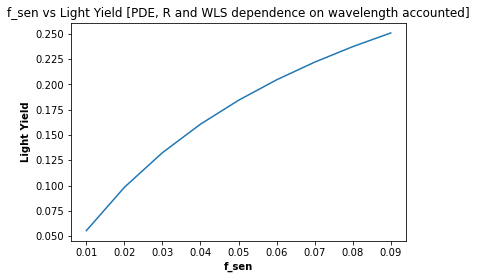

In [28]:
# %matplotlib qt
plt.figure()
plt.plot(f_sen_vector, calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_PEN_uniform))
plt.ylabel('Light Yield', weight = 'bold')
plt.xlabel('f_sen', weight = 'bold')
plt.title('f_sen vs Light Yield [PDE, R and WLS dependence on wavelength accounted]')

In [29]:
calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,0.01, FF_sys, R_values_uniform, R_Wall_PEN_uniform*0.99)*40*0.5


0.9602933493548705

In [30]:
calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform,0.01, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.99)*40

2.488255223185613

<br>
<h2 style = 'color: orange; text-align:center; font-size:18pt; '>
Data and Plots
</h2>
<br>

Text(0.5, 1.0, 'Wavelength vs PDE')

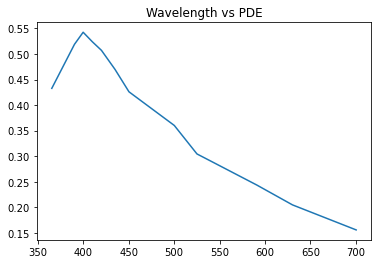

In [31]:
### 1
#PDE
plt.figure()
plt.plot(PDE['photon_wavelegnth'], PDE['PDE_'])
plt.title('Wavelength vs PDE')

Text(0.5, 1.0, 'Wavelength vs Silicon PhotoMultiplier reflectivity')

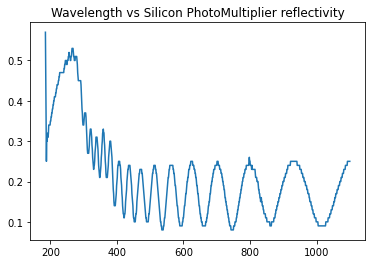

In [32]:
### 2
## R_values
plt.figure()
plt.plot(R_values['Wavelength'], R_values['R'])
## plt.plot(R['black_mask - Storage 135551'],	R['Unnamed: 8']) ### not using this file
plt.title('Wavelength vs Silicon PhotoMultiplier reflectivity')

In [33]:
### 3
# R_Wall_TPB
# TPB reflectivity below 400 nm may not be accurate

Text(0.5, 1.0, 'wavelength vs TPB Reflectiivty')

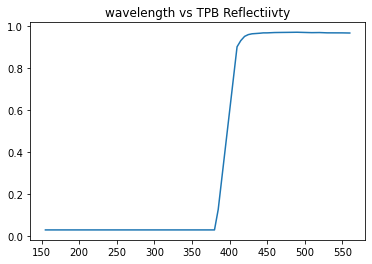

In [34]:
plt.figure()
plt.plot(R_Wall_TPB['photon_wavelength'][:22], R_Wall_TPB['TPB_reflectivity'][:22])
plt.title('wavelength vs TPB Reflectiivty')

In [35]:
### 4
# R_Wall_PEN

Text(0.5, 1.0, 'wavelength vs PEN reflectivity')

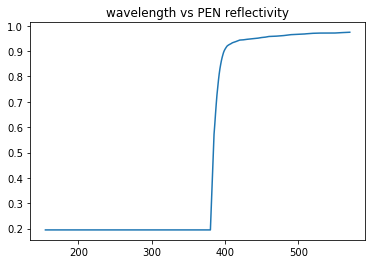

In [36]:
plt.figure()
plt.plot(R_Wall_PEN['photon_wavelength'][:46],	R_Wall_PEN['PEN_reflectivity'][:46])
plt.title('wavelength vs PEN reflectivity')

In [37]:
### 5
# E_TPB

Text(0.5, 1.0, 'TBP Emission spectrum')

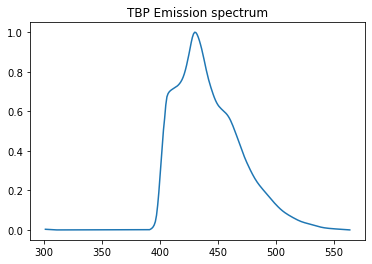

In [38]:
plt.figure()
plt.plot(E_TPB['wavelength'], E_TPB['efficiency'])
plt.title('TBP Emission spectrum')

In [39]:
### 6
# E_PEN

Text(0.5, 1.0, 'PEN Emission spectrum')

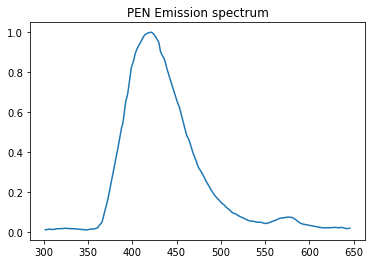

In [40]:
plt.figure()
plt.plot(E_PEN['wavelength'], E_PEN['efficiency'])
plt.title('PEN Emission spectrum')

<h2> <span style = 'color: lightgreen'> Sanity Check </span> </h2>

In [41]:
### use delta function in calc_wavelength_dependent_LY to prove that calculation isn't wrong
### wavelengths, Emission_spectrum, PDE, f_sen, FF_sys, R, R_wall
from scipy import signal
delta_signal = signal.unit_impulse(510,255)
print('sanity check value', calc_wavelength_dependent_LY(wavelength_vector, delta_signal, 0.47*delta_signal,f_sen, FF_sys, 0.17*delta_signal, 0.95*delta_signal))

sanity check value 0.07886118598382753


## <span style = "color : orange "> f_sen vs Light Yield Plot  </span>
### <span style = "color : red ">        Inludes uncertainity in R_Wall measurement </span>

In [42]:
### Plot of f_sen vs LC?
### include Rwall error budget Rwall and Rwall*0.988
# %matplotlib qt

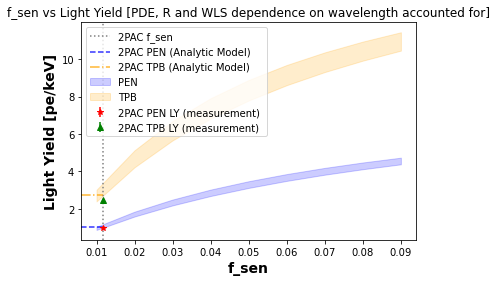

In [43]:
# plt.close('all') # relevant only if using qt for plotting

plt.figure('f_sen vs LY')

LC_PEN_upper = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_PEN_uniform)
LC_PEN_lower = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_PEN_uniform*0.988)

plt.fill_between(f_sen_vector, LC_PEN_lower, LC_PEN_upper, color='blue', alpha = 0.2, label = 'PEN')

LC_TPB_upper = 40*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_TPB_uniform)
LC_TPB_lower = 40*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform,f_sen_vector, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.988)

plt.fill_between(f_sen_vector, LC_TPB_lower, LC_TPB_upper, color='orange', alpha = 0.2, label = 'TPB')

### vertical line to show f_sen for 2PAC
plt.axvline(0.01176, 0, 1, linestyle = 'dotted', color = 'gray', label='2PAC f_sen')

### horizontal lines correspond to the LY expected from 2PAC according to the Analytic Model
### ??? change f_sens from 0.01176 to 0.01
LC_PEN_2PAC_ref = 40*0.4720*calc_wavelength_dependent_LY(wavelength_vector, E_PEN_uniform, PDE_uniform, 0.01176, FF_sys, R_values_uniform, R_Wall_PEN_uniform*0.988)
LC_TPB_2PAC_ref = 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, 0.01176, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.988)

plt.axhline(LC_PEN_2PAC_ref, 0, 0.0655, linestyle = '--', color = 'blue', alpha =0.8, label='2PAC PEN (Analytic Model)')
plt.axhline(LC_TPB_2PAC_ref, 0, 0.0655, linestyle = '-.', color = 'orange', alpha =0.8, label='2PAC TPB (Analytic Model)')

### single point to represent TPB yield
plt.errorbar([0.01176], [2.50*0.40], yerr = [0.05*0.40], fmt ='*', color ='red', label = '2PAC PEN LY (measurement) ')
plt.errorbar([0.01176], [2.50], yerr = [0.05], fmt = '^', color ='green', label = '2PAC TPB LY (measurement) ')

plt.ylabel('Light Yield [pe/keV]' , size =14, weight = 'bold')
plt.xlabel('f_sen', size =14, weight = 'bold')
plt.title('f_sen vs Light Yield [PDE, R and WLS dependence on wavelength accounted for]')
plt.legend(loc = 'upper left')

# plt.savefig(r'C:\Users\sarth\Dropbox\Wavelength_Shifters\f_sen_vs_LC.jpeg')

In [44]:
# Calculating LY for comparison with 2PAC measurement
print( 'lower bound on LY for TPB:', 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, 0.01176, FF_sys, R_values_uniform, R_Wall_TPB_uniform*0.988))

lower bound on LY for TPB: 2.7595824522831047


In [45]:
print('Upper bond on LY for TPB:', 40*1*calc_wavelength_dependent_LY(wavelength_vector, E_TPB_uniform, PDE_uniform, 0.01176, FF_sys, R_values_uniform, R_Wall_TPB_uniform*1.00))

Upper bond on LY for TPB: 3.448379177738592


<h2 style = 'color: #ff00ff'> 
    TPB results from paper
</h2>
<body>
<span style = 'color : yellow'> Simulation </span>: 2.6 +- 0.5 pe/keV 
    <br>
<span style = 'color : yellow'>Measurement </span>: 2.50 +- 0.05 pe/keV
</body>

In [46]:
# LY_PEN_2PAC_ref

In [47]:
# LY_TPB_2PAC_ref

In [48]:
# plt.figure('Compare_plots')
# plt.subplot(2,2, 1)
# plt.show('temp0001')
# plt.subplot(2,2, 1)
# plt.show('temp0003')
#### learn either plotly or seaborn or something
#### use object oriented plots

In [49]:
## check values

In [50]:
# This notebook is being written to implement Segreto model which including Rayleigh Scattering and absorption effects. This section does that.
#
#
#
#
#
#
#
#
### one important thing to note is that current modification only work when there is no WLS coating on the Photon Detection Device,i.e, SiPM
### will add additional terms later for case when wven SiPM are covered with WLS.
### function to calculate Function F(Q, ...) 
### basically we have to modify this expression to use Q factor

<h2 style= 'text-align: center'>
    <span style  = 'color: orange'> ⭐ Wavelength Dependent  </span> <span style = "color: lightgreen"> LY </span> <span style  = 'color: orange'>  with Absorbtion and Rayleigh Scattering  </span>
</h2>

<!-- <p style = 'font-size:14pt'>  -->
<p style= ' font-size:14pt; text-align: left; color:white;'>
Use values stored in DataFrame directly in the formula below:
</p>

<span style = 'color : #5EA9E5;'>

$$
\color{lightgreen}{LY} = \frac{\sum[ \color{tomato}{E_{pen}(\lambda)} \times LY(PDE(\lambda), f_{sen}, FF_{sys}, R(\lambda), R_{wall}(\lambda), \color{magenta}{Q(\lambda)}, \color{magenta}{\epsilon_{ws}} )]}{\sum \color{tomato}{E_{pen}(\lambda)}}
$$
</span>
<!-- </p> -->

<h3 style = 'color: lime '> calculating $Q$ factor
</h3>

In [51]:
from sympy import Symbol, exp, integrate

x = Symbol('x')

## L_char is basically what L tilde is in segreto paper

## lambda_eff is basically lambda tilde in segreto paper

def calc_lambda_eff(lambda_abs, lambda_R):
    ''' Calculates effective lambda for Rayleigh scattering and Absorption.'''
    return (lambda_R*lambda_abs)/(lambda_R + lambda_abs)

def P_func(L_char, lambda_eff):
    ''' 
    P_func: P(x) is the probability distribution of the distances that a photon would travel in absence of interactions (between two reflections or between a reflection and absorption/detection).
    The P_func can be changed later if it is felt that we need a different probability distribution function. 
    '''
    return 1/(L_char)

def calc_URA(L_char, lambda_eff, Prob_distr):
    return integrate( Prob_distr*exp(-x/lambda_eff), (x, 0, L_char))

def calc_Q( L_char,  lambda_abs, lambda_R):
    ''' 
    This function is used to compute Q factor for both visible and VUV photons.
    Note:
    We'll call calc_URA since URA is wavelength dependent. We'll also make a call to P_func so for the same reason.
    '''
    lambda_eff = calc_lambda_eff(lambda_abs, lambda_R)
    
    Pdf = P_func(L_char, lambda_eff); # Probability distribution function
    
    URA_value = float(calc_URA(L_char, lambda_eff, Pdf));
    
    return (1-(1-URA_value)*lambda_eff/lambda_R)/(URA_value)

<h2 style = 'color:lime';> plotting $\lambda_R$ vs $Q$ for comparison with segreto paper
</h2>

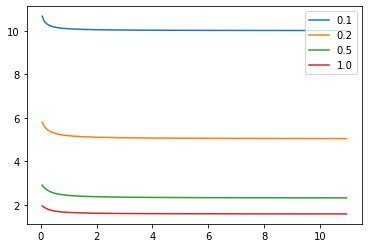

In [52]:
# import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline

lambda_R = np.arange(0,11, 0.05)

Q_1 = [calc_Q(L_char=1, lambda_abs=0.1, lambda_R = scat) for scat in lambda_R];

Q_2 = [calc_Q(L_char=1, lambda_abs=0.2, lambda_R = scat) for scat in lambda_R];

Q_3 = [calc_Q(L_char=1, lambda_abs=0.5, lambda_R = scat) for scat in lambda_R];

Q_4 = [calc_Q(L_char=1, lambda_abs=1.0, lambda_R = scat) for scat in lambda_R];

plt.figure()
plt.plot( lambda_R, Q_1, label = '0.1')
plt.plot( lambda_R, Q_2, label = '0.2')
plt.plot( lambda_R, Q_3, label = '0.5')
plt.plot( lambda_R, Q_4, label = '1.0')
plt.legend()

In [53]:
# Q_vis = calc_Q(L_char=100, lambda_abs=50, lambda_R=25);

# Q_vuv = calc_Q(L_char=100, lambda_abs=75, lambda_R=50);